In [2]:
from Bio import SeqIO
from Bio.Seq import Seq

import pandas as pd
import numpy as np

import plotly.graph_objects as go
import plotly.express as px

import matplotlib.pyplot as plt
import matplotlib as mpl

In [3]:
fasta_file = "../data/E.Coli/GCA_000005845.2/cds_from_genomic.fna"

In [4]:
records = []
for record in SeqIO.parse(fasta_file, format="fasta"):
    records.append(str(record.seq))


In [5]:
from itertools import product
from collections import defaultdict as ddict

codon_list = ["".join(i) for i in list(product("TCAG", repeat=3))]

translation_table = ddict(list)
for codon in codon_list:
    tr = str(Seq(codon).translate())
    translation_table[tr].append(str(codon))

print("codon_list", codon_list)
print("\ntranslation_table", dict(translation_table))

codon_list ['TTT', 'TTC', 'TTA', 'TTG', 'TCT', 'TCC', 'TCA', 'TCG', 'TAT', 'TAC', 'TAA', 'TAG', 'TGT', 'TGC', 'TGA', 'TGG', 'CTT', 'CTC', 'CTA', 'CTG', 'CCT', 'CCC', 'CCA', 'CCG', 'CAT', 'CAC', 'CAA', 'CAG', 'CGT', 'CGC', 'CGA', 'CGG', 'ATT', 'ATC', 'ATA', 'ATG', 'ACT', 'ACC', 'ACA', 'ACG', 'AAT', 'AAC', 'AAA', 'AAG', 'AGT', 'AGC', 'AGA', 'AGG', 'GTT', 'GTC', 'GTA', 'GTG', 'GCT', 'GCC', 'GCA', 'GCG', 'GAT', 'GAC', 'GAA', 'GAG', 'GGT', 'GGC', 'GGA', 'GGG']

translation_table {'F': ['TTT', 'TTC'], 'L': ['TTA', 'TTG', 'CTT', 'CTC', 'CTA', 'CTG'], 'S': ['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC'], 'Y': ['TAT', 'TAC'], '*': ['TAA', 'TAG', 'TGA'], 'C': ['TGT', 'TGC'], 'W': ['TGG'], 'P': ['CCT', 'CCC', 'CCA', 'CCG'], 'H': ['CAT', 'CAC'], 'Q': ['CAA', 'CAG'], 'R': ['CGT', 'CGC', 'CGA', 'CGG', 'AGA', 'AGG'], 'I': ['ATT', 'ATC', 'ATA'], 'M': ['ATG'], 'T': ['ACT', 'ACC', 'ACA', 'ACG'], 'N': ['AAT', 'AAC'], 'K': ['AAA', 'AAG'], 'V': ['GTT', 'GTC', 'GTA', 'GTG'], 'A': ['GCT', 'GCC', 'GCA', 'GCG'], 'D

In [6]:
translation_table["S"]

['TCT', 'TCC', 'TCA', 'TCG', 'AGT', 'AGC']

In [7]:
def visualize_plotly(record, selected_aa):
    selected_codons = translation_table[selected_aa]
    codons = [record[i:i + 3] for i in range(0, len(record), 3)]

    data = {"codon": codons,
            "translation": [str(Seq(c).translate()) for c in codons],
            "codon_id": [selected_codons.index(c) if c in selected_codons else -1 for c in codons],
            "all_codon_id": [codon_list.index(c) for c in codons]
            }

    df = pd.DataFrame(data)
    
    fig = px.imshow([df["codon_id"]], aspect="auto", height=300)
    fig.show()

    fig = go.Figure(go.Heatmap(
        z=[df["codon_id"]],
        colorscale="rainbow"),
    )
    fig.show()


visualize_plotly(records[2], selected_aa="A")

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

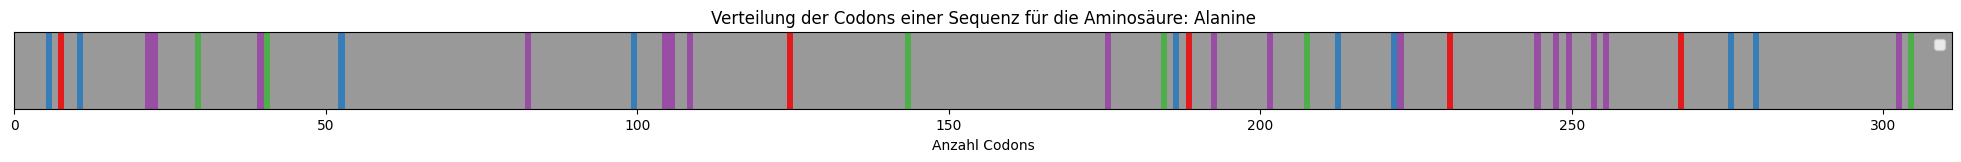

In [13]:
def visualize_mpl(record, selected_aa, mpl_colormap):
    selected_codons = translation_table[selected_aa]
    codons = [record[i:i + 3] for i in range(0, len(record), 3)]
    codon_ids = [selected_codons.index(c) if c in selected_codons else -1 for c in codons]

    colors = mpl.colormaps[mpl_colormap].colors

    z = [[colors[c] for c in codon_ids]]
    
    fig, ax = plt.subplots()

    fig.set_figwidth(25)
    fig.set_figheight(1)
    ax.set_title("Verteilung der Codons einer Sequenz für die Aminosäure: Alanine")
    ax.set_xlabel("Anzahl Codons")
    ax.set_yticks([])
    ax.pcolormesh(z)


visualize_mpl(records[2], selected_aa="A", mpl_colormap="Set1")